## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


### Inicialización

In [8]:
# Cargar todas las librerías

import pandas as pd
import seaborn as sns
import numpy as np
from math import factorial
from scipy import stats as st
from scipy.stats import ttest_ind
import math as mt
import matplotlib.pyplot as plt


In [9]:
# Carga los archivos de datos en 

df_games = pd.read_csv('games.csv')


In [10]:
# Explorar las primeras filas del dataset

print(df_games.head())


             Name Platform  Year_of_Release     Genre  NA_sales  EU_sales  \
0         Pac-Man     2600           1982.0    Puzzle      7.28      0.45   
1        Pitfall!     2600           1981.0  Platform      4.21      0.24   
2       Asteroids     2600           1980.0   Shooter      4.00      0.26   
3               2     2600           1980.0   Shooter      2.56      0.17   
4  Space Invaders     2600              NaN   Shooter      2.36      0.14   

   JP_sales  Other_sales  Critic_Score User_Score Rating  Total Sales  
0       0.0         0.08           NaN        NaN    NaN         7.81  
1       0.0         0.05           NaN        NaN    NaN         4.50  
2       0.0         0.05           NaN        NaN    NaN         4.31  
3       0.0         0.03           NaN        NaN    NaN         2.76  
4       0.0         0.03           NaN        NaN    NaN         2.53  


In [11]:
# Obtener información sobre las columnas y tipos de datos

print(df_games.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
 11  Total Sales      16715 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB
None


In [12]:
# Revisar si hay valores nulos

print(df_games.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
Total Sales           0
dtype: int64


## Prepara los datos

### Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [6]:
# Renombrar las columnas a minúsculas

df_games.columns = df_games.columns.str.lower()

# Mostrar los nuevos nombres de las columnas
(df_games.head())


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Convierte los datos en los tipos necesarios

In [7]:
# Convertir columna 'year_of_release' a int64

df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')
df_games['year_of_release'].unique()


<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [8]:
# Convertir columna 'user_score' a float64 

df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
df_games['user_score'] = df_games['user_score'].astype('float64')

print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB
None


#### Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

**Comentarios**

- Convertimos la columna *year_of_release* de tipo float64 a int64 ya que es más fácil catalogar los años como número sin decimales.

- Convertimos la columna *user_score* de object a float64  ya que vamos a utilizar más adelante estos números para realizar el análisis estadístico.


### Si es necesario, elige la manera de tratar los valores ausentes:

- Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
- ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
- Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos. 

In [9]:
# Eliminar filas con valores nulos en 'Name' y 'Genre'

df_games.dropna(subset=['name', 'genre'], inplace=True)

print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB
None


In [10]:
# Reemplazar 'TBD' con 'unknown' en la columna 'rating'

df_games.replace('TBD', 'unknown', inplace=True)
print(df_games.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB
None


In [11]:
# Buscamos los valores nulos agrupando columnas

df_games.groupby('year_of_release').agg(
    total_games_by_year = ('name','count'),
    info_user_score = ('user_score','count'),
    info_critic_score = ('critic_score','count')
)

,total_games_by_year,info_user_score,info_critic_score
year_of_release,,,
1980,9,0,0
1981,46,0,0
1982,36,0,0
1983,17,0,0
1984,14,0,0
1985,14,1,1
1986,21,0,0
1987,16,0,0
1988,15,1,1


**Comentarios**

- Eliminamos las filas con valores nulos en las columnas *'name'* y *'gender'*: Un juego sin nombre o género pierde contexto en cualquier análisis, por lo que eliminar estas filas minimiza errores en los resultados. La ausencia en estas columnas podría ser causada por errores al recopilar o ingresar datos, especialmente si son juegos menos populares o sin suficiente información disponible.

- Conservaremos los valores nulos en las columnas *'year_of_release'*, *'critic_score', 'user_score'* y *'rating'*:  Dejar estos valores indicará que faltan datos precisos. La ausencia en estas columnas podría deberse a que ciertos juegos antiguos o independientes no tienen un registro oficial del año de lanzamiento y no recibieron una clasificación oficial de ESRB.

- Reemplazamos ‘tbd’ con 'unknown' en la columna ‘rating’: Cambiar estos valores como 'unknown' nos permite mantener los datos y al mismo tiempo indicar que no hay información disponible.


### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [12]:
# Calcular las ventas totales sumando las ventas de todas las regiones
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Mostrar las primeras filas con la nueva columna de ventas totales
df_games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [13]:
# Confirmamos los cambios realizados en el dataframe

print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 2.2+ MB
None


## Analiza los datos

### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

1980     9
1981    46
1982    36
1983    17
1984    14
1985    14
1986    21
1987    16
1988    15
1989    17
Name: year_of_release, dtype: Int64


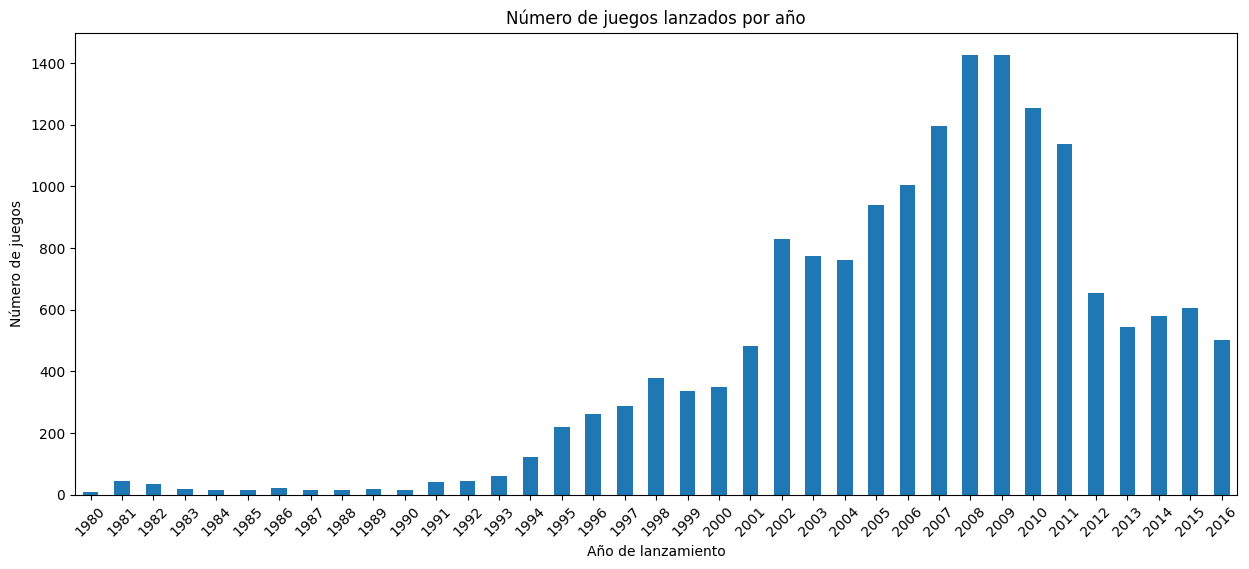

In [14]:
# Contar cuántos juegos fueron lanzados por cada año
df_games_by_year = df_games['year_of_release'].value_counts().sort_index()

# Mostrar el conteo de juegos por año
print(df_games_by_year.head(10))

# Evaluar la significancia de los datos (gráficamente, por ejemplo)
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
df_games_by_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.show()


**Comentarios**

Los datos anteriores a 1995 muestran pocos lanzamientos por año, lo que sugiere que esos años podrían no ser tan representativos.

El gráfico muestra un aumento gradual en los lanzamientos de juegos a partir de 1995, con un crecimiento más rápido entre 2000 y 2008, alcanzando su punto máximo en 2008. La explosión de consolas como la PlayStation, Xbox y Nintendo en los años 2000 puede haber contribuido al auge de los lanzamientos.

Después de 2008, hay una disminución en los lanzamientos de nuevos juegos. Factores como la crisis financiera de 2008 podrían haber sido la causa de dicha disminución.



### Observa cómo varían las ventas de una plataforma a otra. 

#### Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.

- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.


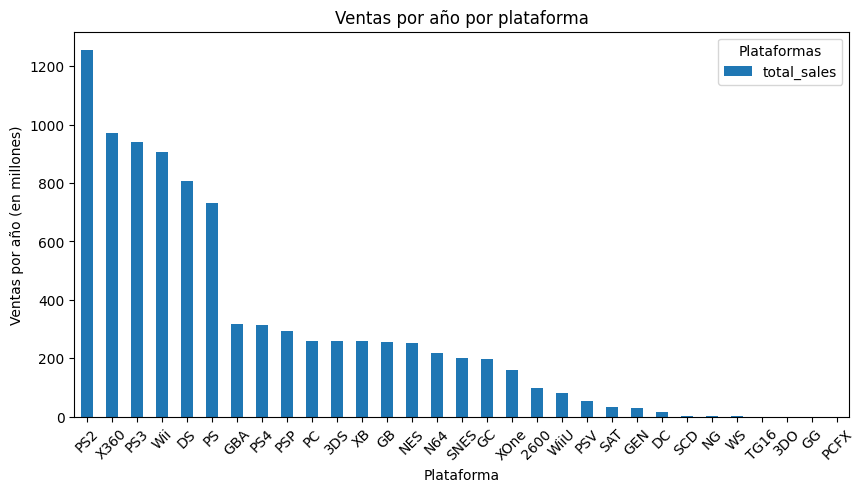

In [15]:
df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize=(10,5))

# Título y etiquetas
plt.title('Ventas por año por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas por año (en millones)')
plt.legend(title='Plataformas')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

**Comentarios**

Generamos una gráfica de barras para detectar cuáles son las plataformas con mayores ventas totales.

Considerando la información del número de juegos lanzados y las ventas totales por plataforma, crearemos un gráfico de distribución para analizar el comportamiento de las 10 plataformas con más ventas tomando como referencia la información del año 2000 en adelante ya que, como podemos observar en el gráfico *'Número de juegos lanzados por año'*, a partir de esa fecha es cuando empezó a incrementar el número de juegos lanzados al mercado.

In [16]:
# Filtrar datos para considerar solo las ventas totales a partir del año 2000

df_filtered_games_sales_years = df_games[df_games['year_of_release'] >= 2000]

(df_filtered_games_sales_years.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [17]:
# Calcular las ventas totales por plataforma
platform_sales = df_filtered_games_sales_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Seleccionar las 10 plataformas principales por ventas totales
df_top_10_platforms = platform_sales.head(10)

# Guardar las 10 plataformas en un dataframe
df_top_10_platforms = df_top_10_platforms.reset_index()

# Mostrar el dataframe con las 10 plataformas con mayores ventas totales
(df_top_10_platforms)


,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS4,314.14
6,GBA,312.88
7,PSP,289.53
8,3DS,257.81
9,XB,251.57


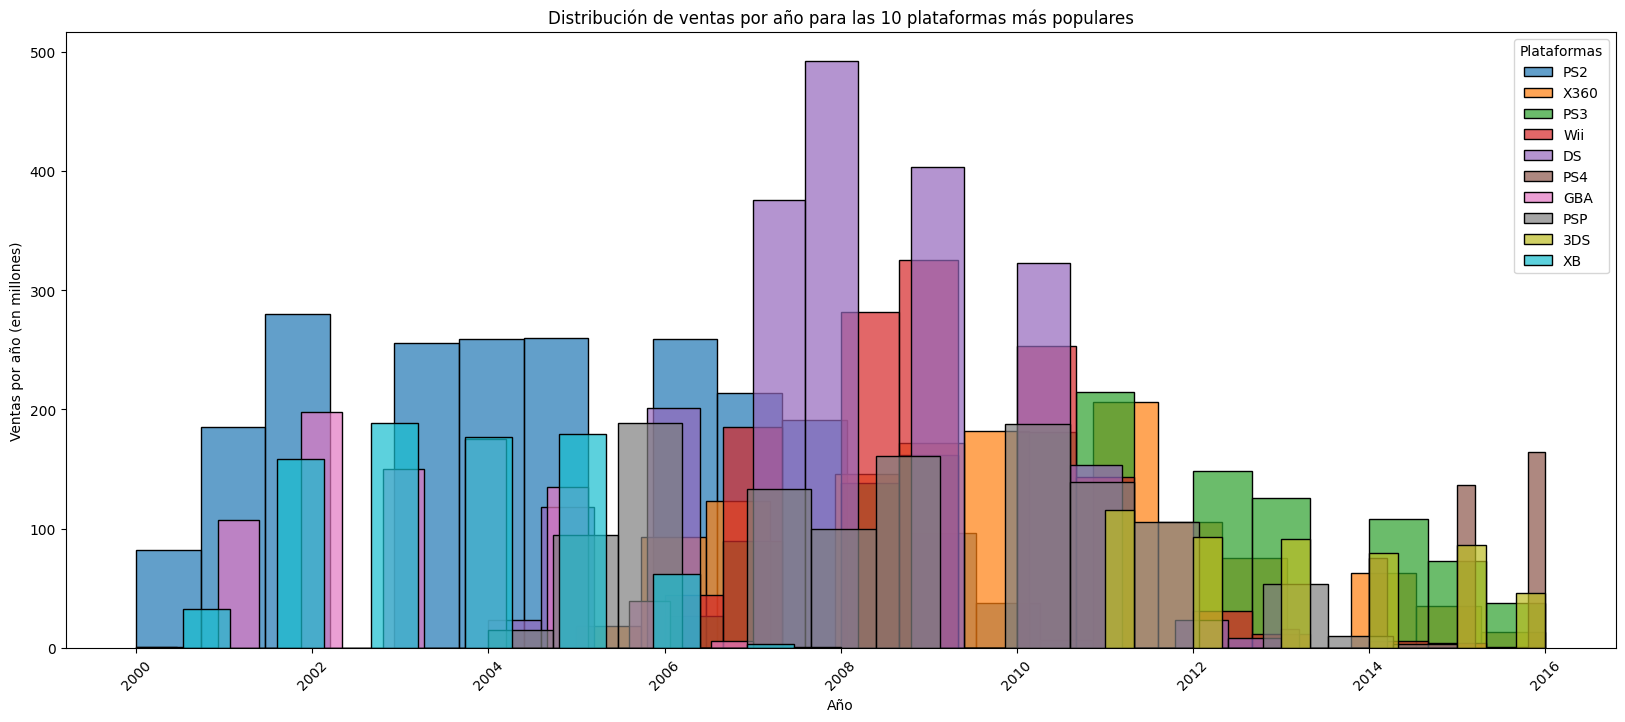

In [18]:
# Distribución de las 10 plataformas con mayores ventas totales a partir del año 2000

# Definir la paleta de colores
palette = sns.color_palette("tab10", len(df_top_10_platforms))

plt.figure(figsize=(20, 8))

# Graficar cada plataforma con su color correspondiente
for i, platform in enumerate(df_top_10_platforms['platform']):
    platform_data = df_filtered_games_sales_years[df_filtered_games_sales_years['platform'] == platform]
    sns.histplot(platform_data['year_of_release'], kde=False, label=platform, bins=15, color=palette[i], alpha=0.7)

# Título y etiquetas
plt.title('Distribución de ventas por año para las 10 plataformas más populares')
plt.xlabel('Año')
plt.ylabel('Ventas por año (en millones)')
plt.legend(title='Plataformas')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

**Comentarios**

En la distribución de ventas por año para las 10 plataformas más populares, se observan varios patrones interesantes:
- PS2 (PlayStation 2) domina claramente las ventas durante los primeros años (2000-2006).

- Wii, Xbox 360 y PS3 empiezan a ganar terreno a partir del 2006-2007, en la generación de consolas posterior a PS2. Especialmente notable es el crecimiento de la Wii y el Xbox 360 en este periodo, con picos de ventas alrededor de 2008.

- DS (Nintendo DS) también tiene un período de ventas notable alrededor de 2008-2010, lo que refleja la popularidad de esta consola portátil de Nintendo.

- A partir de 2012, vemos una caída generalizada en las ventas de consolas como Wii, DS, PSP y PS2, lo que indica que estas plataformas están alcanzando el final de su ciclo de vida. Esto es natural, ya que las nuevas generaciones de consolas (como PS4 y Xbox One) empiezan a tomar el relevo.

- PS4 y 3DS son las plataformas más destacadas en los últimos años de la gráfica (2014-2016), lo que refleja el lanzamiento y éxito de la nueva generación de consolas de Sony y Nintendo en ese periodo.

#### Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer? 

In [19]:
(platform_sales)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       205.72
GC       196.73
XOne     159.32
PS       140.70
WiiU      82.19
PSV       53.81
N64       37.30
GB        29.00
DC         7.41
WS         0.96
Name: total_sales, dtype: float64

In [20]:
df_botton_8_platforms = ['WS', 'DC', 'GB', 'N64', 'PSV', 'WiiU', 'PS', 'GC'] # No se considera la plataforma XOne ya que es un modelo reciente

In [21]:
df_platforms_life_cycle = df_filtered_games_sales_years[df_filtered_games_sales_years['platform'].isin(df_botton_8_platforms)].groupby(['year_of_release','platform'])['total_sales'].sum().reset_index() 

(df_platforms_life_cycle.head())

,year_of_release,platform,total_sales
0,2000,DC,5.99
1,2000,GB,19.76
2,2000,N64,33.97
3,2000,PS,96.37
4,2000,WS,0.68


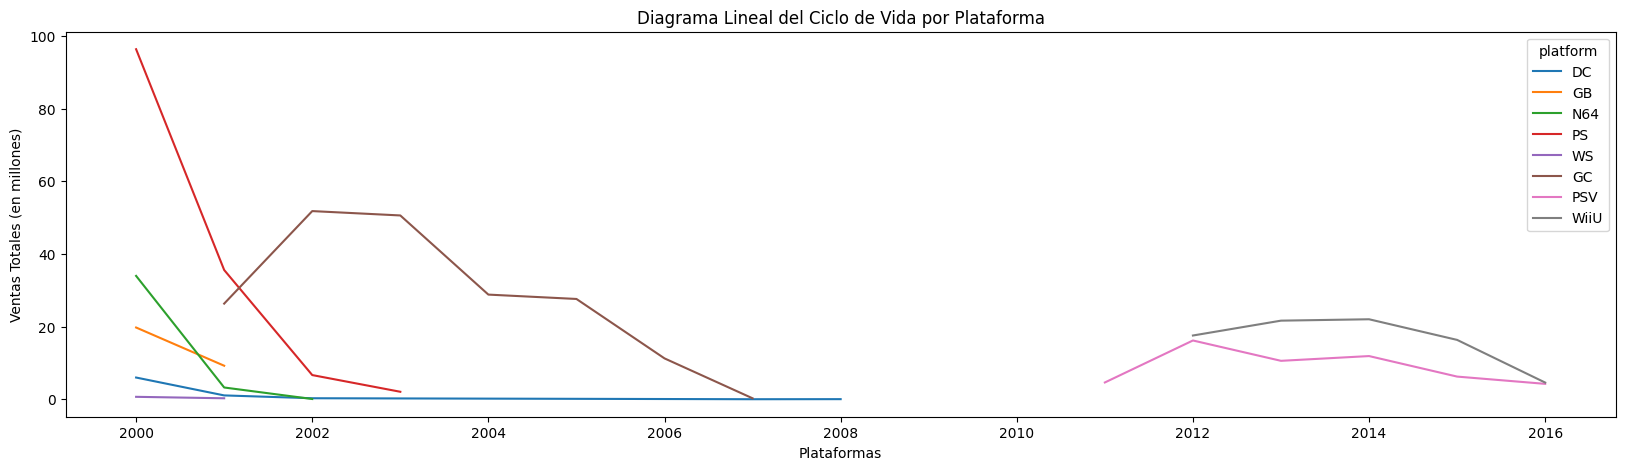

In [22]:
# Generar gráfico con la información del dataframe:
plt.figure(figsize=(20,5))
sns.lineplot(data = df_platforms_life_cycle, x = 'year_of_release', y = 'total_sales', hue = 'platform')

# Título y etiquetas
plt.title('Diagrama Lineal del Ciclo de Vida por Plataforma')
plt.xlabel('Plataformas')
plt.ylabel('Ventas Totales (en millones)')

# Mostrar el gráfico
plt.show()

**Comentarios**

- Las plataformas clásicas (como PS, N64 y GB) tuvieron picos rápidos en ventas, seguidos de un declive abrupto.
- Las plataformas más recientes en el gráfico, como WiiU y PSV, tuvieron un ciclo de vida más prolongado, con ventas más distribuidas a lo largo del tiempo.
- Generalmente, las plataformas pueden durar entre 5 a 10 años antes de ser reemplazadas por nuevas generaciones como es el caso de PS. Sin embargo, algunas plataformas pueden durar más tiempo si mantienen su relevancia, pero al final, todas alcanzan su punto de declive debido a que ya no se mantuvieron en el mercado activo.

#### Crea un diagrama de caja para las ventas globales de todos los juegos desglosados por plataforma.

- ¿Son significativas las diferencias en las ventas?
- ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.


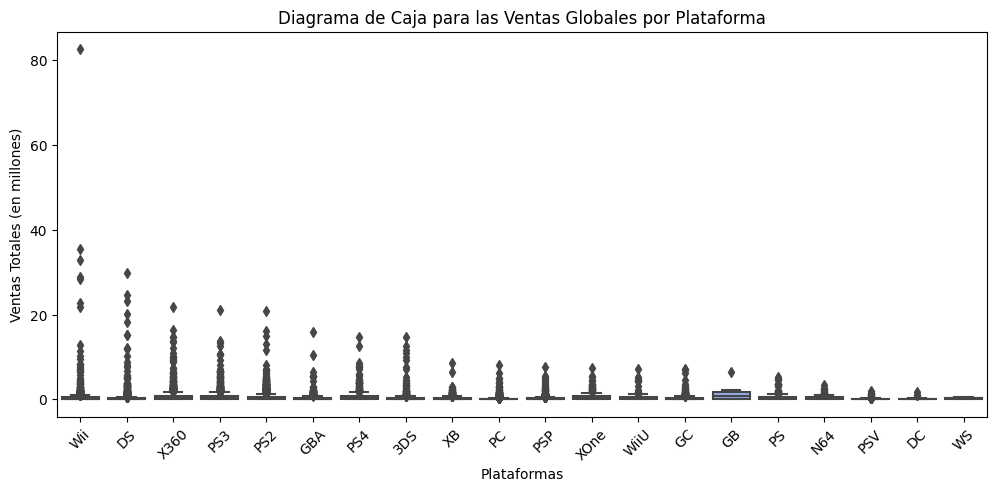

In [23]:
# Crear el diagrama de caja (boxplot) para visualizar la distribución de ventas por plataforma a partir del año 2000
plt.figure(figsize=(12, 5))
sns.boxplot(x='platform', y='total_sales', data=df_filtered_games_sales_years)

# Título y etiquetas
plt.title('Diagrama de Caja para las Ventas Globales por Plataforma')
plt.xlabel('Plataformas')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

**Comentarios**

- Las plataformas más nuevas y exitosas (como Wii, DS, X360) tienden a tener tanto ventas promedio más altas como una mayor dispersión de las ventas. Esto sugiere que estas plataformas han tenido tanto títulos exitosos como otros con menos impacto.
- Plataformas clásicas como PS, GB, N64, y DC tienen una dispersión de ventas mucho más reducida, lo que indica que, en promedio, los juegos no alcanzaron ventas tan altas en comparación con las plataformas más modernas.
- Las plataformas menos populares tienen ventas muy bajas, con la mayoría de los juegos vendiendo cantidades modestas, sin valores atípicos significativos que las hubieran destacado.

#### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección).

Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

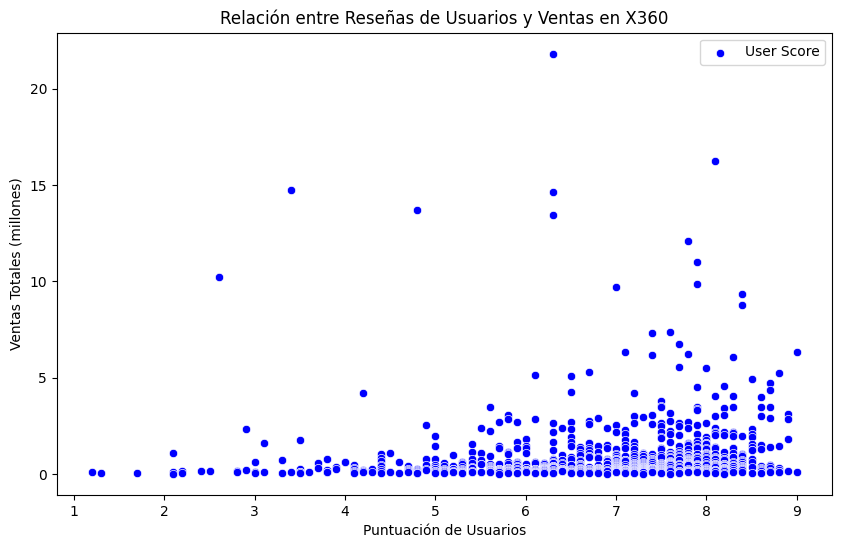

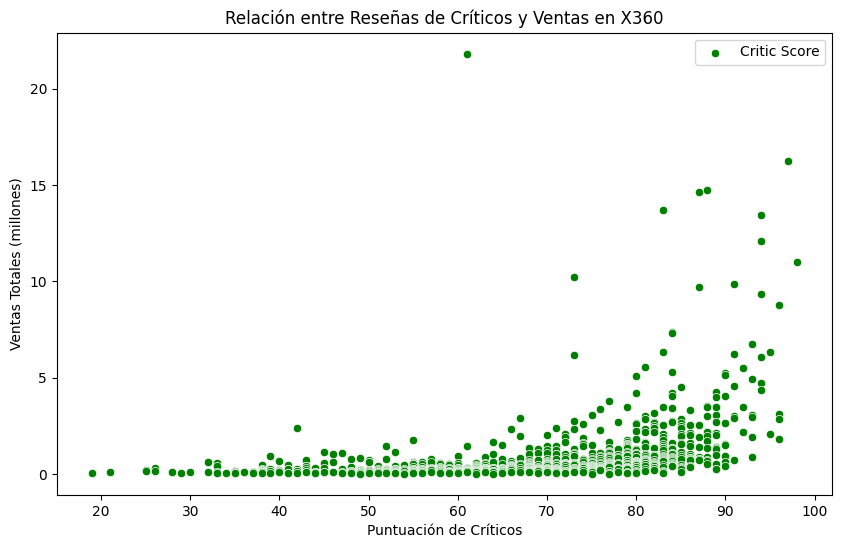

Correlación entre puntuación de usuarios y ventas: 0.11
Correlación entre puntuación de críticos y ventas: 0.39


In [24]:
# Filtrar los datos para la plataforma X360
x360_games = df_filtered_games_sales_years[df_filtered_games_sales_years['platform'] == 'X360']

# Eliminar filas con valores nulos en reseñas o ventas
x360_games = x360_games.dropna(subset=['user_score', 'critic_score', 'total_sales'])

# Crear gráfico de dispersión para la relación entre reseñas de usuarios y ventas globales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=x360_games, color='blue', label='User Score')
plt.title('Relación entre Reseñas de Usuarios y Ventas en X360')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones)')
plt.show()

# Crear gráfico de dispersión para la relación entre reseñas de críticos y ventas globales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=x360_games, color='green', label='Critic Score')
plt.title('Relación entre Reseñas de Críticos y Ventas en X360')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones)')
plt.show()

# Calcular la correlación entre reseñas de usuarios y ventas
user_corr, _ = st.pearsonr(x360_games['user_score'], x360_games['total_sales'])
print(f'Correlación entre puntuación de usuarios y ventas: {user_corr:.2f}')

# Calcular la correlación entre reseñas de críticos y ventas
critic_corr, _ = st.pearsonr(x360_games['critic_score'], x360_games['total_sales'])
print(f'Correlación entre puntuación de críticos y ventas: {critic_corr:.2f}')


**Comentarios**

- El gráfico *'Relación entre Reseñas de Usuarios y Ventas en X360'* sugiere que las puntuaciones de usuarios no tienen una correlación lineal fuerte con las ventas de los juegos en la plataforma X360 ya que no hay una tendencia clara que indique que un juego con una mejor puntuación siempre se vende mejor.
- El gráfico *'Relación entre Reseñas de Críticos y Ventas en X360'* sugiere que las puntuaciones de criticos tiene una ligera correlación lineal con las ventas de los juegos en la plataforma X360 aunque no lo suficientemente fuerte como para considerar que sea una variable que afecte las ventas de las plataformas.


#### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.




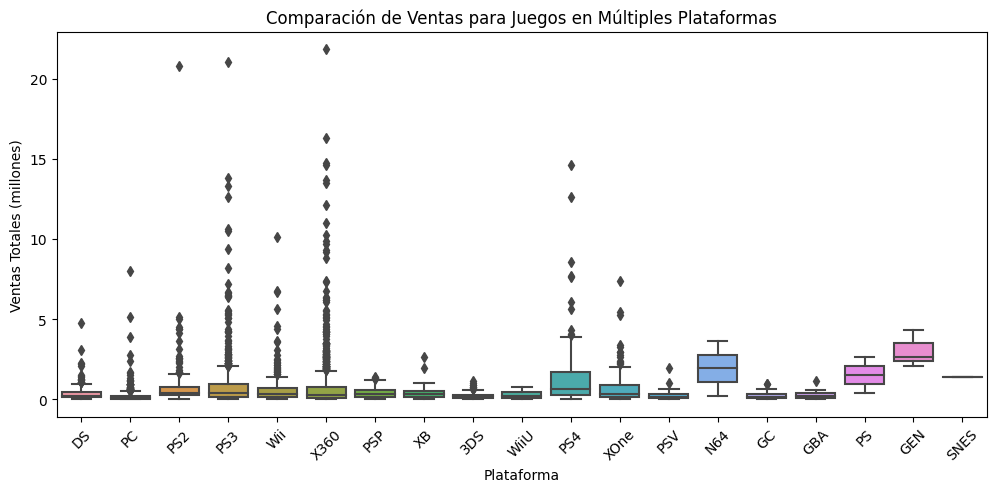

platform
GEN     3.016667
N64     1.930000
PS      1.523333
PS4     1.477345
SNES    1.380000
PS3     0.864473
PS2     0.813153
XOne    0.803125
X360    0.780861
Wii     0.635925
XB      0.432051
DS      0.412105
PSP     0.396968
GBA     0.331429
WiiU    0.267971
GC      0.267273
3DS     0.263529
PSV     0.252340
PC      0.252310
Name: total_sales, dtype: float64


In [25]:
# Filtrar los juegos disponibles en la plataforma X360
x360_games = df_filtered_games_sales_years[df_filtered_games_sales_years['platform'] == 'X360']

# Filtrar los juegos que están disponibles en más de una plataforma (mismos nombres)
common_games = df_games[df_games['name'].isin(x360_games['name'])]

# Agrupar por nombre de juego y plataforma, y sumar las ventas totales para cada combinación
game_sales_by_platform = common_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

# Crear un gráfico de comparación para ventas de los mismos juegos en diferentes plataformas
plt.figure(figsize=(12, 5))
sns.boxplot(x='platform', y='total_sales', data=game_sales_by_platform)
plt.title('Comparación de Ventas para Juegos en Múltiples Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()

# Resumir las ventas promedio por plataforma para los juegos comunes
average_sales_by_platform = game_sales_by_platform.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

print(average_sales_by_platform)


**Comentarios**

- Hay una gran desigualdad en la distribución de ventas de los videojuegos: unas pocas plataformas dominan en términos de éxitos masivos.
- El éxito de un juego depende más de la plataforma: Wii, PS2, PS3 y X360 tuvieron muchos juegos de alto rendimiento.
- Algunas plataformas tienen ventas más consistentes, como es el caso de PC y PS4, mientras que otras dependen más de unos pocos juegos exitosos.

Este análisis confirma la tendencia de que solo un pequeño porcentaje de juegos logran ventas masivas, lo que enfatiza la importancia de franquicias exitosas y títulos exclusivos en cada plataforma.

#### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

genre
Action          1526.16
Sports          1130.92
Shooter          912.70
Role-Playing     731.22
Misc             718.35
Racing           561.06
Platform         494.42
Simulation       335.41
Fighting         311.90
Adventure        183.74
Puzzle           138.20
Strategy         115.07
Name: total_sales, dtype: float64


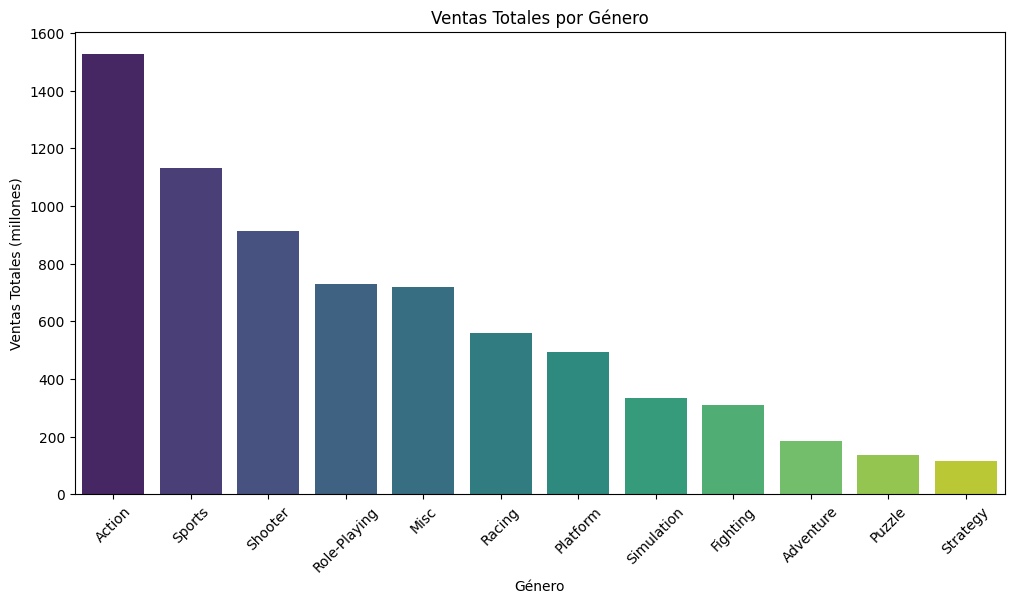

In [26]:
# Agrupar por género y calcular las ventas totales
genre_sales = df_filtered_games_sales_years.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

print(genre_sales)

# Crear un gráfico de barras para visualizar las ventas por género
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()


**Comentarios**

- Como se observa en el gráfico, los juegos de Acción cuentan con las mayores ventas con ganancias de más de 1500 millones.
- Los siguientes géneros en el ranking corresponden a juegos de Deportes y Shooter con ventan significativas pero un tanto lejos del total de los juegos de Acción ya que éstos géneros se encuentran entre los 1100 y 900 millones, lo cual es una diferencia significativa en comparación de las ventas de los juegos de Acción.
- Los géneros Role-Playing y Misc han generado ventas casi similares por alrededor de 700 millones lo cual no es tan malo pero se encuentra bastante alejado de las ventas de los 3 principales géneros.

## Paso 4. Crea un perfil de usuario para cada región

### Para cada región (NA, EU, JP) determina: 

#### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.


In [27]:
# Agrupar por plataforma y región para calcular las ventas totales en cada región
na_sales = df_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_sales = df_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_sales = df_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Mostrar las 5 plataformas principales en cada región
print("Principales plataformas en Norteamérica (NA):")
print(na_sales)

print("\nPrincipales plataformas en Europa (EU):")
print(eu_sales)

print("\nPrincipales plataformas en Japón (JP):")
print(jp_sales) 

Principales plataformas en Norteamérica (NA):
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Principales plataformas en Europa (EU):
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Principales plataformas en Japón (JP):
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


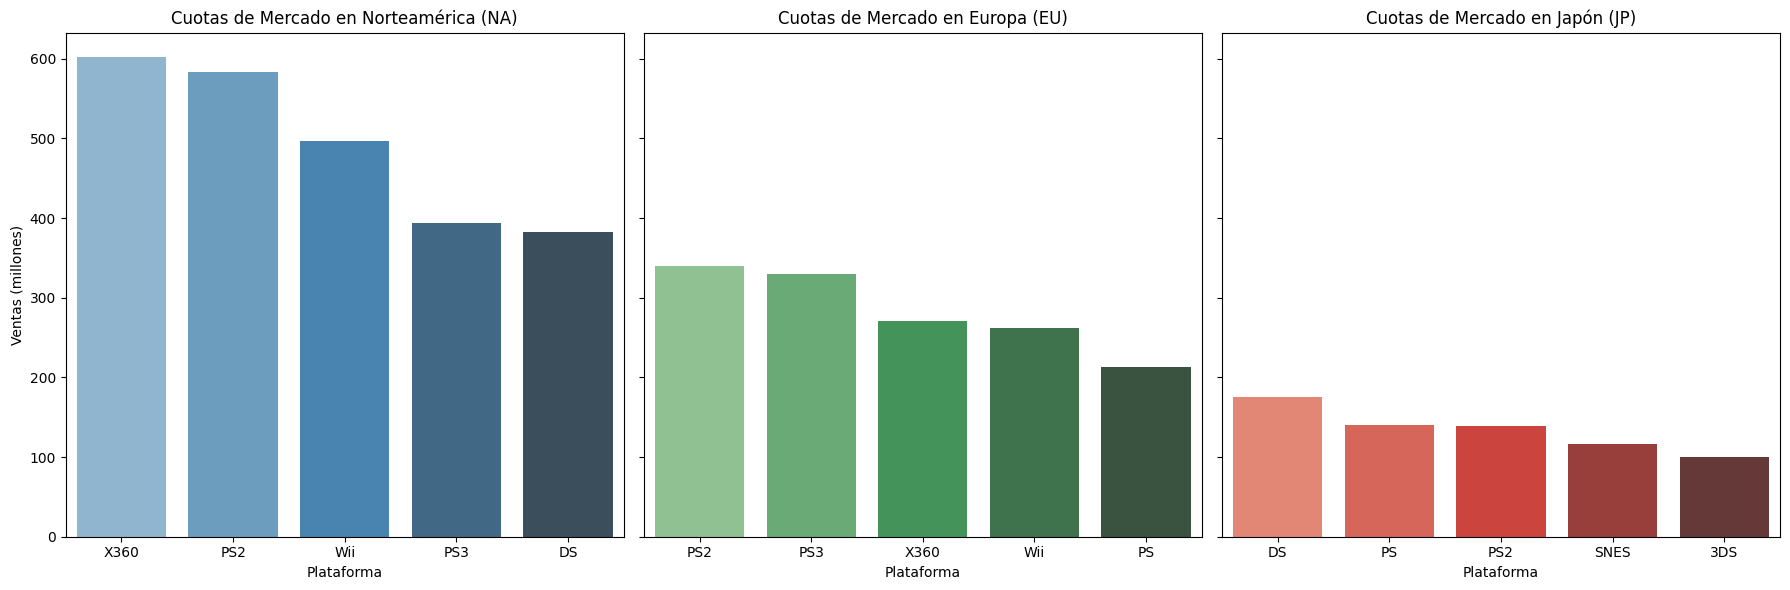

In [28]:
# Visualización de las cuotas de mercado
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Norteamérica
sns.barplot(x=na_sales.index, y=na_sales.values, ax=axes[0], palette="Blues_d")
axes[0].set_title('Cuotas de Mercado en Norteamérica (NA)')
axes[0].set_xlabel('Plataforma')
axes[0].set_ylabel('Ventas (millones)')

# Europa
sns.barplot(x=eu_sales.index, y=eu_sales.values, ax=axes[1], palette="Greens_d")
axes[1].set_title('Cuotas de Mercado en Europa (EU)')
axes[1].set_xlabel('Plataforma')

# Japón
sns.barplot(x=jp_sales.index, y=jp_sales.values, ax=axes[2], palette="Reds_d")
axes[2].set_title('Cuotas de Mercado en Japón (JP)')
axes[2].set_xlabel('Plataforma')

plt.tight_layout()
plt.show()

**Comentarios**

Para la región de Norteamérica observamos que las dos plataformas con mayor número de ventas totales son X360 y PS2, ambas con poco más del 16% del mercado.

Respecto a Europa, las dos plataformas con mayor número de ventas totales son PS2 y PS3, cada una con casi el 16% del mercado.
Esto indica que los usuarios para ambas regiones tienen preferencias similares en cuanto a las plataformas que suelen adquirir.

En el caso de la región de Japón, la plataforma con mayor número de ventas totales es la DS con poco más del 21% del mercado.

Podemos observar que los usuarios en la región Japón tiene una ligera preferencia por las consolas portátiles (DS y 3DS) pero la plataforma PS2 se posiciona como la segunda favorita del mercado.


#### Los cinco géneros principales. Explica la diferencia.


In [29]:
# Agrupar por género y región para calcular las ventas totales en cada región
na_genres = df_filtered_games_sales_years.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_genres = df_filtered_games_sales_years.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_genres = df_filtered_games_sales_years.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Mostrar los 5 géneros principales en cada región
print("Principales géneros en Norteamérica (NA):")
print(na_genres)

print("\nPrincipales géneros en Europa (EU):")
print(eu_genres)

print("\nPrincipales géneros en Japón (JP):")
print(jp_genres) 

Principales géneros en Norteamérica (NA):
genre
Action          752.27
Sports          589.39
Shooter         495.23
Misc            365.27
Role-Playing    282.30
Name: na_sales, dtype: float64

Principales géneros en Europa (EU):
genre
Action     466.58
Sports     339.58
Shooter    294.02
Misc       196.71
Racing     192.02
Name: eu_sales, dtype: float64

Principales géneros en Japón (JP):
genre
Role-Playing    241.71
Action          132.23
Misc             85.43
Sports           75.88
Platform         55.27
Name: jp_sales, dtype: float64


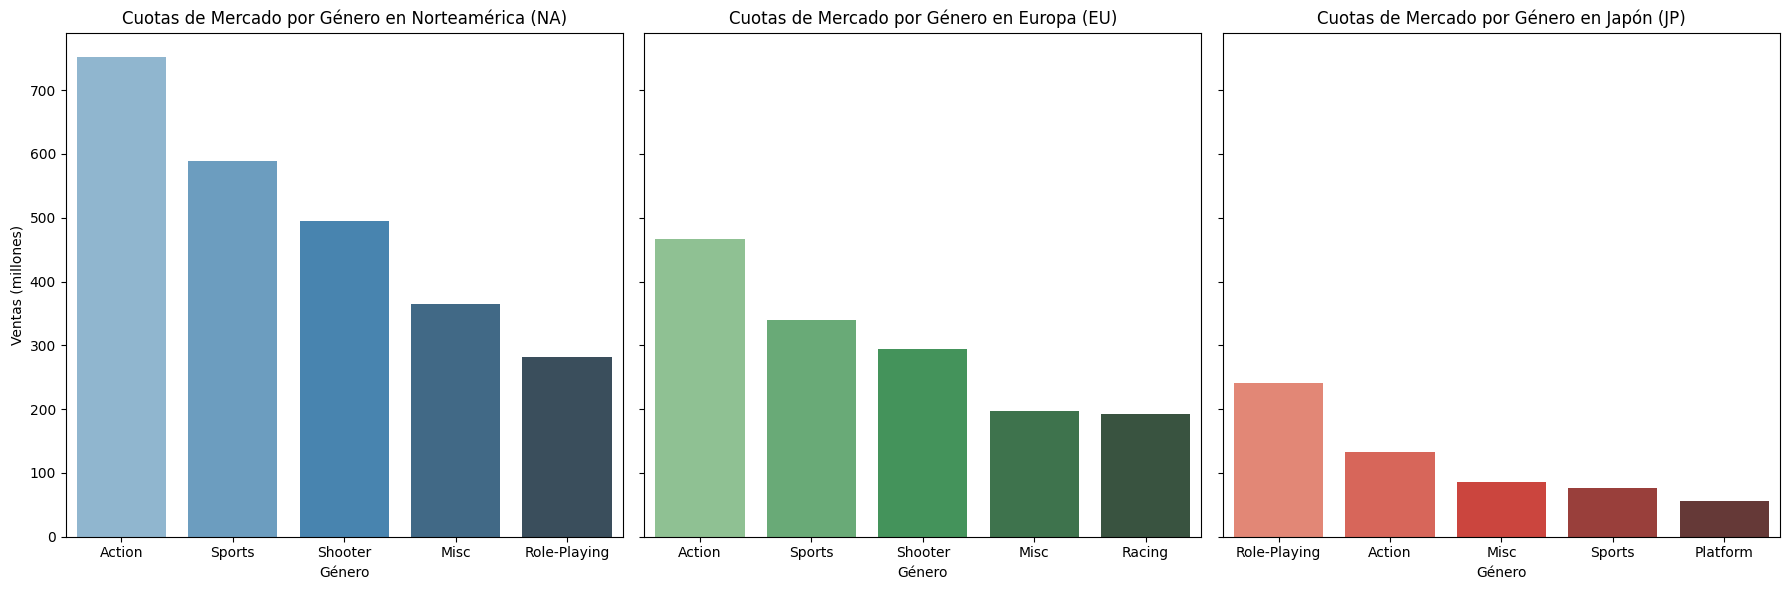

In [30]:
# Visualización de las cuotas de mercado por género
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Norteamérica
sns.barplot(x=na_genres.index, y=na_genres.values, ax=axes[0], palette="Blues_d")
axes[0].set_title('Cuotas de Mercado por Género en Norteamérica (NA)')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Ventas (millones)')

# Europa
sns.barplot(x=eu_genres.index, y=eu_genres.values, ax=axes[1], palette="Greens_d")
axes[1].set_title('Cuotas de Mercado por Género en Europa (EU)')
axes[1].set_xlabel('Género')

# Japón
sns.barplot(x=jp_genres.index, y=jp_genres.values, ax=axes[2], palette="Reds_d")
axes[2].set_title('Cuotas de Mercado por Género en Japón (JP)')
axes[2].set_xlabel('Género')

plt.tight_layout()
plt.show()

**Comentarios**

Nuevamente encontramos que las preferencias para las regiones de Norteamérica y Europa son similares ya que Acción, Deportes y Disparos suelen ser géneros dominantes para ambas regiones.

En el caso de Japón, la tendencia se inclina en favor del género Role-Playing seguido por los juegos de Acción.

#### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [31]:
# Agrupar por clasificación ESRB y región para calcular las ventas totales
na_esrb = df_filtered_games_sales_years.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_esrb = df_filtered_games_sales_years.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_esrb = df_filtered_games_sales_years.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Mostrar el impacto de las clasificaciones ESRB en cada región
print("Impacto de ESRB en Norteamérica (NA):")
print(na_esrb)

print("\nImpacto de ESRB en Europa (EU):")
print(eu_esrb)

print("\nImpacto de ESRB en Japón (JP):")
print(jp_esrb)

Impacto de ESRB en Norteamérica (NA):
rating
E       1249.26
M        727.80
T        709.86
E10+     345.50
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

Impacto de ESRB en Europa (EU):
rating
E       690.61
M       472.40
T       392.71
E10+    183.33
AO        0.61
EC        0.11
RP        0.03
Name: eu_sales, dtype: float64

Impacto de ESRB en Japón (JP):
rating
E       189.91
T       131.01
M        57.84
E10+     40.20
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64


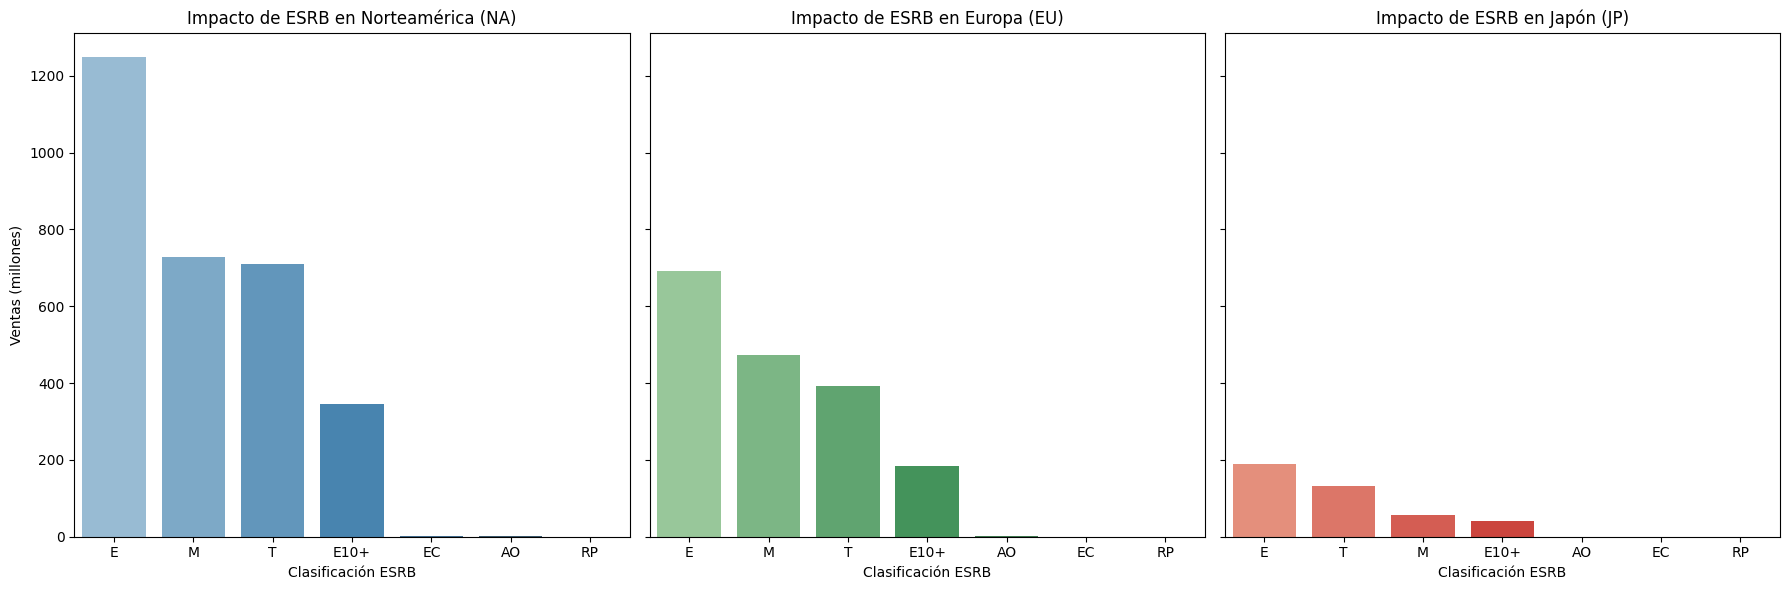

In [32]:
# Visualización del impacto de ESRB en cada región
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Norteamérica
sns.barplot(x=na_esrb.index, y=na_esrb.values, ax=axes[0], palette="Blues_d")
axes[0].set_title('Impacto de ESRB en Norteamérica (NA)')
axes[0].set_xlabel('Clasificación ESRB')
axes[0].set_ylabel('Ventas (millones)')

# Europa
sns.barplot(x=eu_esrb.index, y=eu_esrb.values, ax=axes[1], palette="Greens_d")
axes[1].set_title('Impacto de ESRB en Europa (EU)')
axes[1].set_xlabel('Clasificación ESRB')

# Japón
sns.barplot(x=jp_esrb.index, y=jp_esrb.values, ax=axes[2], palette="Reds_d")
axes[2].set_title('Impacto de ESRB en Japón (JP)')
axes[2].set_xlabel('Clasificación ESRB')

plt.tight_layout()
plt.show()

**Comentarios**

Norteamérica y Europa muestran patrones similares, con una clara preferencia por los juegos clasificados como E, pero con una fuerte presencia de juegos para adultos (M) y adolescentes (T).

Japón, por otro lado, tiene un mercado considerablemente más pequeño para juegos clasificados bajo ESRB, con una menor demanda de juegos para adultos y adolescentes comparado con NA y EU.

Las clasificaciones AO,EC y RP tienen ventas casi inexistentes en todas las regiones, lo que sugiere que estos tipos de juegos tienen una demanda muy baja a nivel global.

## Paso 5. Prueba las siguientes hipótesis:


### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Establece tu mismo el valor de umbral alfa.


**Hipótesis 1:**

*Hipótesis Nula (H₀):* Las calificaciones promedio de los usuarios para Xbox One y PC son las mismas.

*Hipótesis Alternativa (H₁):* Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

El valor alfa es 0.05, lo que significa que si el valor p es menor que 0.05, rechazamos la hipótesis nula.

In [33]:
# Filtrar los datos por plataforma Xbox One y PC
xbox_one_ratings = df_filtered_games_sales_years[df_filtered_games_sales_years['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = df_filtered_games_sales_years[df_filtered_games_sales_years['platform'] == 'PC']['user_score'].dropna()

# Nivel crítico de significación estadística
alpha = 0.05 

# Prueba de hipótesis con la prueba t de dos muestras independientes
results = st.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

# Imprimir el valor p obtenido
print('Valor p:', results.pvalue)

# Comparar el valor p con el nivel de significación estadística
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio son las mismas o similares.")


Valor p: 1.5670097178375495e-05
Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. 

Establece tu  mismo el calor de umbral alfa.

**Hipótesis 2:**

*Hipótesis Nula (H₀):* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

*Hipótesis Alternativa (H₁):* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.

El valor alfa es 0.05, lo que significa que si el valor p es menor que 0.05, rechazamos la hipótesis nula.

In [34]:
# Filtrar los datos por género Acción y Deportes
action_ratings = df_filtered_games_sales_years[df_filtered_games_sales_years['genre'] == 'Action']['user_score'].dropna()
sports_ratings = df_filtered_games_sales_years[df_filtered_games_sales_years['genre'] == 'Sports']['user_score'].dropna()

# Nivel crítico de significación estadística
alpha = 0.05 

# Prueba de hipótesis con la prueba t de dos muestras independientes
results = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Imprimir el valor p obtenido
print('Valor p:', results.pvalue)

# Comparar el valor p con el nivel de significación estadística
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio son las mismas o similares.")
    


Valor p: 0.10115120156606783
No podemos rechazar la hipótesis nula: Las calificaciones promedio son las mismas o similares.


### Explica:
 - Cómo formulaste las hipótesis nula y alternativa.
 - Qué criterio utilizaste para probar las hipótesis y por qué.

Para probar estas hipótesis, utilicé la prueba t de dos muestras independientes. Los criterios que me llevaron a elegir esta prueba son los siguientes:

- Tipo de datos: Las calificaciones de los usuarios son datos numéricos continuos, y estamos interesados en comparar los promedios de dos grupos independientes.
- Comparación de medias: La prueba t es ideal cuando se desea comparar las medias de dos grupos para determinar si son significativamente diferentes.
- Varianzas desiguales: Utilicé la opción equal_var=False en la función ttest_ind porque las varianzas entre las calificaciones de los usuarios pueden no ser iguales. 
- Nivel de significancia: Definí el valor alfa como 0.05. Esto significa que acepto un 5% de probabilidad de rechazar la hipótesis nula cuando en realidad es verdadera.

## Paso 6. Escribe una conclusión general

**Campaña para el año 2017**

El análisis de datos sobre las ventas de videojuegos, las plataformas, los géneros y las calificaciones de los usuarios ha permitido extraer conclusiones clave que pueden guiar el lanzamiento de campañas de marketing específicas para las regiones de Norteamérica y Europa, así como para Japón. 

1) Norteamérica y Europa:
    - Enfocar los esfuerzos publicitarios en juegos de Acción, Deportes y Disparos, que tienen una alta popularidad y ventas consistentes en estas regiones.
    - Promover juegos para consolas como Wii, PS4, Xbox One, con un enfoque en juegos multijugador y en línea, que generan altos niveles de interacción en estas áreas.
    - Utilizar influenciadores y comunidades de gamers competitivos para maximizar la exposición y atracción de jugadores.


2) Japón:
    - Centrar la campaña en juegos de RPG y Acción, especialmente títulos relacionados con historias profundas y personajes desarrollados.
    - Promocionar plataformas de Nintendo y PlayStation, particularmente la Nintendo DS, Nintendo Switch y PlayStation 4, ya que son las consolas más queridas por el público japonés.
    - Fomentar la narrativa y la jugabilidad inmersiva, dado que los juegos que enfatizan estas características tienden a resonar mejor en el mercado japonés.


**Conclusión:**

El análisis sugiere que, para obtener el mayor éxito en las campañas de marketing, es clave tener en cuenta las diferencias regionales en términos de preferencias de plataformas, géneros de juegos y ciclo de vida de consolas. Mientras que Norteamérica y Europa presentan mercados competitivos centrados en juegos de acción y deportes, Japón se inclina hacia títulos con una fuerte narrativa y juegos de rol. Adaptar las campañas según estas preferencias garantizará una mejor aceptación y resultados más óptimos en cada región.